In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Flatten, Reshape,MaxPooling2D,UpSampling2D,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import cv2

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data() 

In [3]:
y_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_test = X_test[y_test.ravel()==8]
X_train = X_train[y_train.ravel()==8]

In [4]:
print(X_train.shape)
print(X_test.shape)

(5000, 32, 32, 3)
(1000, 32, 32, 3)


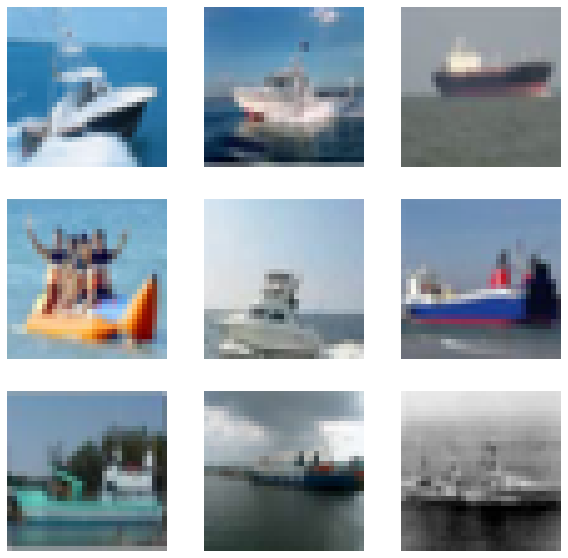

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_train[i])
  plt.axis("off")

In [6]:
def add_salt_pepper_noise(data, p=0.03):
  rows, columns, channels = data.shape
  output = np.zeros(data.shape, np.uint8)
  for i in range(rows):
    for j in range(columns):
      r = np.random.random()
      if r < p/2:
        output[i][j] = [0, 0, 0]
      elif r > p/2 and r <= p:
        output[i][j] = [255, 255, 255]
      else:
        output[i][j] = data[i][j]
  return output

def add_salt_pepper_to_dataset(data):
  count = 0
  end = len(data)
  output_data = []
  while count < end:
    output_data.append(add_salt_pepper_noise(data[count]))
    count+=1
  return np.array(output_data)

In [7]:
X_train_sp_noisy = add_salt_pepper_to_dataset(X_train)
X_test_sp_noisy = add_salt_pepper_to_dataset(X_test)

In [8]:
noise_ratio = 0.06

In [9]:
X_train_g_noisy= X_train/255. + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_train.shape)
X_test_g_noisy= X_test/255. + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_test.shape)

In [10]:
X_train_noisy=np.clip(X_train_g_noisy, 0., 1.)
X_test_noisy=np.clip(X_test_g_noisy, 0., 1.)

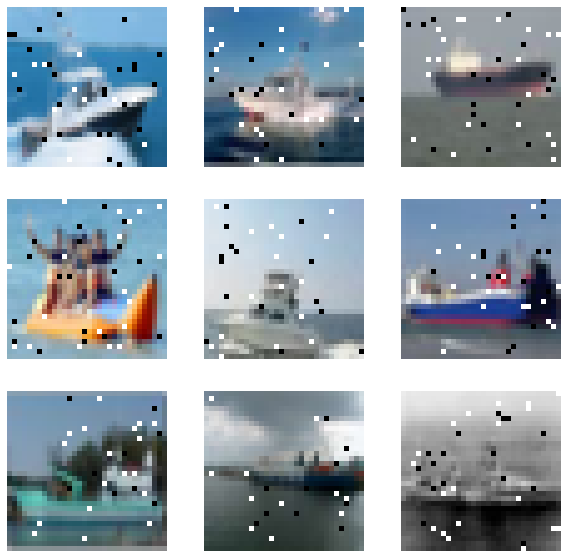

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_train_sp_noisy[i])
  plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


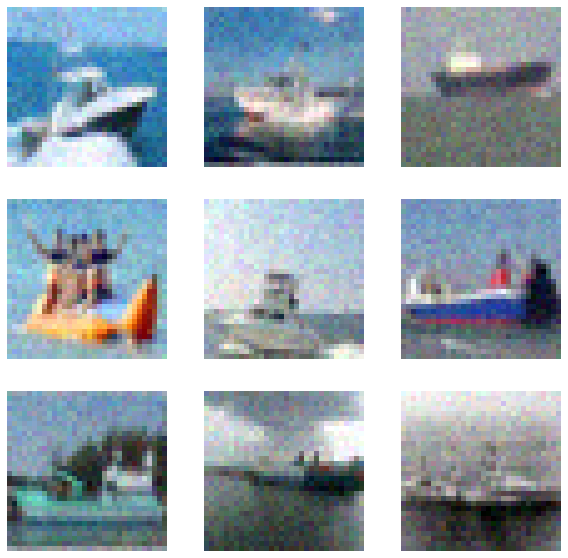

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_train_g_noisy[i])
  plt.axis("off")

In [13]:
train_data = X_train / 255.0
test_data = X_test / 255.0

In [14]:
modelg = Sequential()
modelg.add(Dense(1500, input_dim = 3072, activation='relu'))
modelg.add(Dense(1200, activation = 'relu'))
modelg.add(Dense(900, activation = 'relu'))
modelg.add(Dense(600, activation = 'relu'))
modelg.add(Dense(900, activation = 'relu'))
modelg.add(Dense(1200, activation = 'relu'))
modelg.add(Dense(1500, activation = 'relu'))
modelg.add(Dense(3072, activation = 'sigmoid'))

In [15]:
modelsp = Sequential()
modelsp.add(Dense(1500, input_dim = 3072, activation='relu'))
modelsp.add(Dense(1200, activation = 'relu'))
modelsp.add(Dense(900, activation = 'relu'))
modelsp.add(Dense(600, activation = 'relu'))
modelsp.add(Dense(900, activation = 'relu'))
modelsp.add(Dense(1200, activation = 'relu'))
modelsp.add(Dense(1500, activation = 'relu'))
modelsp.add(Dense(3072, activation = 'sigmoid'))

In [16]:
modelg.compile(optimizer='adam',loss='mse')
modelg_early_stop = EarlyStopping(monitor='loss',patience=3)

In [17]:
modelg_trained = modelg.fit(X_train_g_noisy.reshape(5000,3072), train_data.reshape(5000,3072), validation_split=0.1, epochs=50, batch_size=32, callbacks = [modelg_early_stop])

Epoch 1/50
141/141 [==============================] - 12s 80ms/step - loss: 0.0447 - val_loss: 0.0387
Epoch 2/50
141/141 [==============================] - 11s 81ms/step - loss: 0.0359 - val_loss: 0.0320
Epoch 3/50
141/141 [==============================] - 11s 81ms/step - loss: 0.0315 - val_loss: 0.0281
Epoch 4/50
141/141 [==============================] - 11s 79ms/step - loss: 0.0285 - val_loss: 0.0274
Epoch 5/50
141/141 [==============================] - 11s 79ms/step - loss: 0.0282 - val_loss: 0.0272
Epoch 6/50
141/141 [==============================] - 11s 75ms/step - loss: 0.0279 - val_loss: 0.0273
Epoch 7/50
141/141 [==============================] - 11s 75ms/step - loss: 0.0278 - val_loss: 0.0261
Epoch 8/50
141/141 [==============================] - 11s 75ms/step - loss: 0.0259 - val_loss: 0.0253
Epoch 9/50
141/141 [==============================] - 11s 78ms/step - loss: 0.0255 - val_loss: 0.0249
Epoch 10/50
141/141 [==============================] - 12s 84ms/step - loss: 0.025

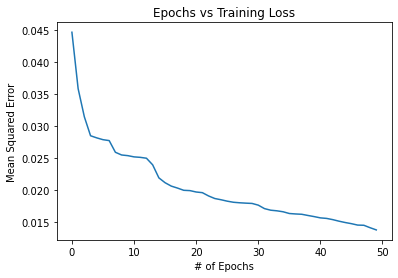

In [18]:
plt.plot(modelg_trained.history['loss'])
plt.title('Epochs vs Training Loss')
plt.xlabel('# of Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [19]:
resultg = modelg.predict(X_test_noisy.reshape(1000,3072))
print(resultg.shape)

(1000, 3072)


In [20]:
resultg = resultg.reshape(1000,32,32,3)

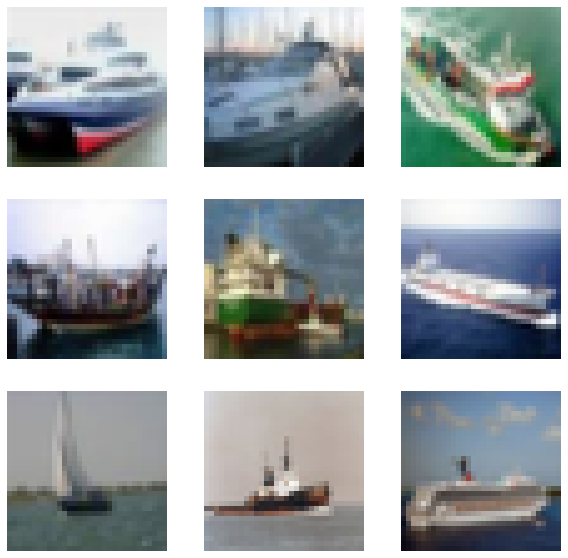

In [21]:
plt.figure(figsize = (10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_test[i])
  plt.axis("off")

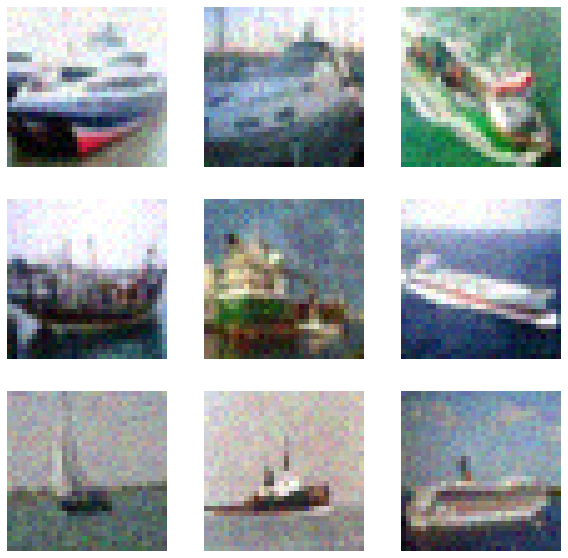

In [22]:
plt.figure(figsize = (10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_test_noisy[i])
  plt.axis("off")

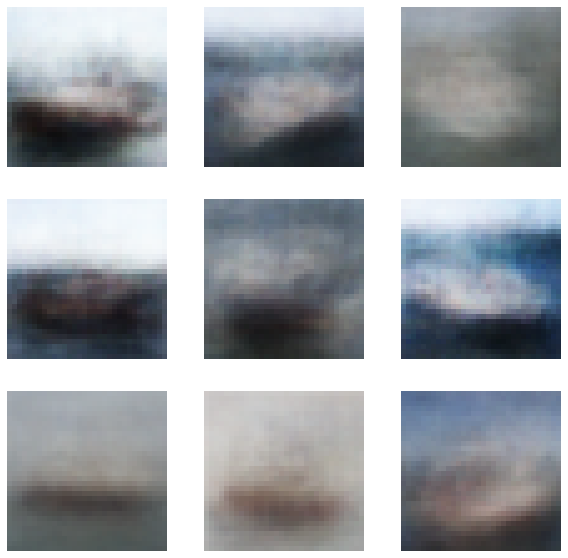

In [23]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((resultg[i]))
  plt.axis("off")